# Tugas Pendahuluan
Tugas Pendahuluan dikerjakan dengan dataset titanic yang dapat didownload pada link [berikut](https://drive.google.com/file/d/16j_9FEHLjh_Y_3CdUtp9M13VwImyT89T/view?usp=sharing). Lakukan prediksi apakah suatu penumpang selamat atau tidak (kolom **survived**), bernilai 0 jika tidak selamat, dan 1 jika selamat.

<br>
Tugas dikerjakan secara berkelompok, dengan 1 kelompok terdiri atas 2 mahasiswa. Waktu pengerjaan dari 28 Maret 2022 - 3 April 2022 pukul 23.59.

## Anggota Kelompok
- 13519205 Muhammad Rifat Abiwardani
- 13519217 Hughie Alghaniyyu Emiliano

# 0. Loading Data and Library

In [1]:
# Put your library here

import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, ShuffleSplit
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Read data here

# Load titanic dataset
df_raw = pd.read_csv("titanic_dataset.csv")
df = df_raw.copy()

In [3]:
df

index  pclass  survived                                          name  \
0         0     3.0       1.0                   Abelseth, Miss. Karen Marie   
1         1     3.0       0.0                       Burns, Miss. Mary Delia   
2         2     1.0       1.0                Fortune, Miss. Alice Elizabeth   
3         3     3.0       1.0  de Messemaeker, Mrs. Guillaume Joseph (Emma)   
4         4     3.0       0.0                     Jonsson, Mr. Nils Hilding   
...     ...     ...       ...                                           ...   
1304   1304     3.0       1.0                         Dahl, Mr. Karl Edwart   
1305   1305     1.0       0.0    Penasco y Castellana, Mr. Victor de Satode   
1306   1306     2.0       1.0                  Becker, Miss. Ruth Elizabeth   
1307   1307     3.0       1.0                Murphy, Miss. Katherine "Kate"   
1308   1308     3.0       0.0                           Sage, Mr. Frederick   

         sex   age  sibsp  parch    ticket      fare        cabin embarked  
0     female  16.0    0.0    0.0    348125    7.6500          NaN        S  
1     female  18.0    0.0    0.0    330963    7.8792          NaN        Q  
2     female  24.0    3.0    2.0     19950  263.0000  C23 C25 C27        S  
3     female  36.0    1.0    0.0    345572   17.4000          NaN        S  
4       male  27.0    0.0    0.0    350408    7.8542          NaN        S  
...      ...   ...    ...    ...       ...       ...          ...      ...  
1304    male  45.0    0.0    0.0      7598    8.0500          NaN        S  
1305    male  18.0    1.0    0.0  PC 17758  108.9000          C65        C  
1306  female  12.0    2.0    1.0    230136   39.0000           F4        S  
1307  female   NaN    1.0    0.0    367230   15.5000          NaN        Q  
1308    male   NaN    8.0    2.0  CA. 2343   69.5500          NaN        S  

[1309 rows x 12 columns]

In [4]:
df.dtypes

index         int64
pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [5]:
df.iloc[5]

index                                   5
pclass                                1.0
survived                              1.0
name        Chambers, Mr. Norman Campbell
sex                                  male
age                                  27.0
sibsp                                 1.0
parch                                 0.0
ticket                             113806
fare                                 53.1
cabin                                  E8
embarked                                S
Name: 5, dtype: object

# I. Data Understanding
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal ini meliputi:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (outlier)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instances dan features)




In [6]:
print("Banyaknya instances yaitu", df.shape[0])
print("Banyaknya features yaitu", df.loc[:, df.columns!='survived'].shape[1])

Banyaknya instances yaitu 1309
Banyaknya features yaitu 11


2. Tipe dari tiap-tiap fitur 

    1. Categorical
        - pclass : ordinal
        - sex
        - embarked
    2. Numeric
        - age : continuous
        - fare : continuous
        - sibsp : discrete
        - parch : discrete
    3. Lainnya
        - ticket
        - cabin
        - name
        - index

3. Banyaknya unique values dari fitur yang bertipe kategorikal

In [7]:
print("Banyaknya Unique Values dari pclass yaitu", len(pd.unique(df['pclass'])))
print("Banyaknya Unique Values dari sex yaitu", len(pd.unique(df['sex'])))
print("Banyaknya Unique Values dari embarked yaitu", len(pd.unique(df['embarked'])))

Banyaknya Unique Values dari pclass yaitu 3
Banyaknya Unique Values dari sex yaitu 2
Banyaknya Unique Values dari embarked yaitu 4


4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur yang tidak bertipe kategorikal

In [8]:
df[['age','fare','sibsp','parch']].describe()

age         fare        sibsp        parch
count  1046.000000  1308.000000  1309.000000  1309.000000
mean     29.881135    33.295479     0.498854     0.385027
std      14.413500    51.758668     1.041658     0.865560
min       0.166700     0.000000     0.000000     0.000000
25%      21.000000     7.895800     0.000000     0.000000
50%      28.000000    14.454200     0.000000     0.000000
75%      39.000000    31.275000     1.000000     0.000000
max      80.000000   512.329200     8.000000     9.000000

## I.2
Carilah:
1. Missing values dari tiap fitur
2. Outliers dari tiap fitur (gunakan metode yang kalian ketahui)

In [9]:
# I.2 Put your code here

print("1. Missing values dari tiap fitur\n")

for column in df.columns[1:]:
    if (column != "survived"):
        print("• "+column+str(": ")+str(len(df[df[column].isna()])))

print("\n", df[df.isna().any(axis=1)])

print("\n\n2. Outliers dari tiap fitur")

for column in df.columns[1:]:
    if (is_numeric_dtype(df[column]) and column != "survived"):
        print("\n• "+column+str(":"))
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3-q1
        lower_bound = q1-1.5*iqr
        upper_bound = q3+1.5*iqr
        outliers = df.loc[(df[column]<lower_bound) | (df[column]>upper_bound)]
        print("\t- Lower bound: "+str(lower_bound))
        print("\t- Upper bound: "+str(upper_bound)+"\n")
        if (len(outliers) == 0):
            print("\t  No outliers")
        else:
            print(str(outliers))
            print("Jumlah: "+str(len(outliers)))

1. Missing values dari tiap fitur

• pclass: 0
• name: 0
• sex: 0
• age: 263
• sibsp: 0
• parch: 0
• ticket: 0
• fare: 1
• cabin: 1014
• embarked: 2

       index  pclass  survived                                          name  \
0         0     3.0       1.0                   Abelseth, Miss. Karen Marie   
1         1     3.0       0.0                       Burns, Miss. Mary Delia   
3         3     3.0       1.0  de Messemaeker, Mrs. Guillaume Joseph (Emma)   
4         4     3.0       0.0                     Jonsson, Mr. Nils Hilding   
6         6     2.0       0.0                           Enander, Mr. Ingvar   
...     ...     ...       ...                                           ...   
1301   1301     3.0       0.0              Gronnestad, Mr. Daniel Danielsen   
1302   1302     3.0       1.0                     Madsen, Mr. Fridtjof Arne   
1304   1304     3.0       1.0                         Dahl, Mr. Karl Edwart   
1307   1307     3.0       1.0                Murphy, Miss. 

	- Lower bound: -27.172999999999995
	- Upper bound: 66.34379999999999

      index  pclass  survived  \
2         2     1.0       1.0   
11       11     1.0       0.0   
12       12     1.0       1.0   
15       15     1.0       1.0   
17       17     1.0       0.0   
...     ...     ...       ...   
1294   1294     1.0       1.0   
1298   1298     1.0       1.0   
1303   1303     1.0       0.0   
1305   1305     1.0       0.0   
1308   1308     3.0       0.0   

                                                   name     sex   age  sibsp  \
2                        Fortune, Miss. Alice Elizabeth  female  24.0    3.0   
11                           Payne, Mr. Vivian Ponsonby    male  23.0    0.0   
12                             Goldenberg, Mr. Samuel L    male  49.0    1.0   
15        Graham, Mrs. William Thompson (Edith Junkins)  female  58.0    0.0   
17                             Thayer, Mr. John Borland    male  49.0    1.0   
...                                                 

Age yang NaN dapat diisi dengan age rata-rata. Fare yang NaN dapat diisi dengan fare rata-rata untuk kelas tiket bersangkutan (kelas tiket ditandai oleh fitur pclass). Embarked yang kosong dapat diisi dengan port frekuensi tertinggi pada fitur embarked.

Age yang outliers masih berada dalam rentang umur wajar bagi manusia, maka tidak akan dianggap outlier, karena data kemungkinan besar betul. SibSp yang outliers masih berada dalam rentang wajar. Pada kasus ekstrim SibSp bernilai 8 dapat mengindikasikan 8 saudara, atau 7 saudara dan 1 suami atau istri. Sebagai contoh adalah Stella Anne Sage (https://www.encyclopedia-titanica.org/titanic-victim/stella-anne-sage.html). ParCh yang outliers juga masih berada dalam rentang wajar. Data dianggap outlier karena mayoritas nilai ParCh adalah 0. Fare yang outliers dapat diteliti ulang berdasarkan sumber berikut (https://lisbdnet.com/how-much-did-tickets-cost-for-the-titanic/). Melihat nilai maksimum fare dalam data adalah £512 dan harga tiket first class diestimasi £870, serta tidak ada nilai fare yang negatif, maka data fare dapat dianggap benar. Untuk menangani dampak nilai ekstrim pada data kontinu fare, dapat dilakukan scaling/normalisasi.

## I.3
Carilah:
1. Korelasi antar fitur

In [10]:
df.corr()

index    pclass  survived       age     sibsp     parch      fare
index     1.000000 -0.003466  0.002967 -0.003376 -0.015501 -0.013538 -0.022424
pclass   -0.003466  1.000000 -0.312469 -0.408106  0.060832  0.018322 -0.558629
survived  0.002967 -0.312469  1.000000 -0.055513 -0.027825  0.082660  0.244265
age      -0.003376 -0.408106 -0.055513  1.000000 -0.243699 -0.150917  0.178739
sibsp    -0.015501  0.060832 -0.027825 -0.243699  1.000000  0.373587  0.160238
parch    -0.013538  0.018322  0.082660 -0.150917  0.373587  1.000000  0.221539
fare     -0.022424 -0.558629  0.244265  0.178739  0.160238  0.221539  1.000000

Dapat dilihat bahwa fitur yang memiliki korelasi tinggi yaitu sebagai berikut.

    - pclass dan survived
    - pclass dan age
    - pclass dan fare 
    - survived dan fare
    - age dan sibsp
    - age dan parch
    - age dan fare
    - sibsp dan parch
    - sibsp dan fare
    - parch dan fare

2. Visualisasikan distribusi dari tiap fitur (kategorikal dan kontinu)

Text(0.5, 1.0, 'pclass')

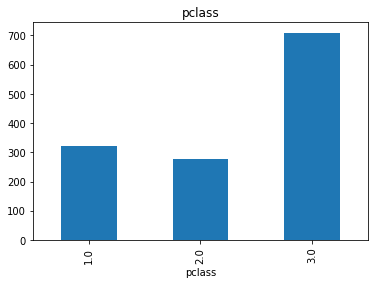

In [11]:
df.groupby('pclass')['index'].count().plot.bar(stacked=True)
plt.title('pclass')

Text(0.5, 1.0, 'sex')

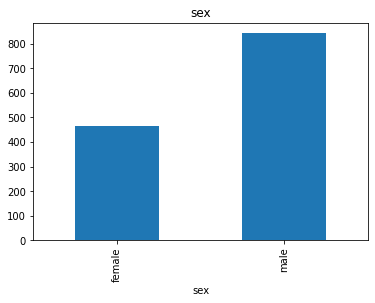

In [12]:
df.groupby('sex')['index'].count().plot.bar(stacked=True)
plt.title('sex')

Text(0.5, 1.0, 'embarked')

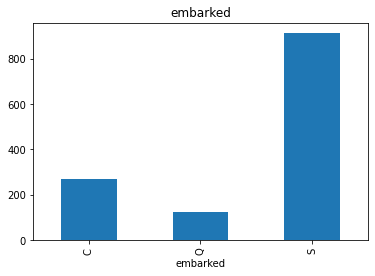

In [13]:
df.groupby('embarked')['index'].count().plot.bar(stacked=True)
plt.title('embarked')

Text(0.5, 1.0, 'age')

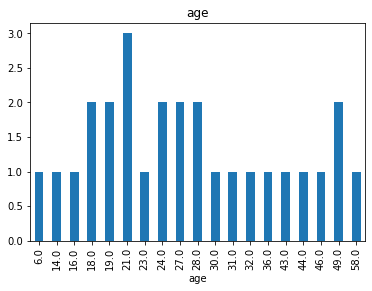

In [14]:
df.head(30).groupby('age')['index'].count().plot.bar(stacked=True)
plt.title('age')

Text(0.5, 1.0, 'fare')

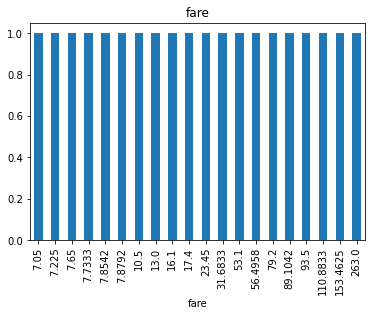

In [15]:
df.head(20).groupby('fare')['index'].count().plot.bar(stacked=True)
plt.title('fare')

Text(0.5, 1.0, 'sibsp')

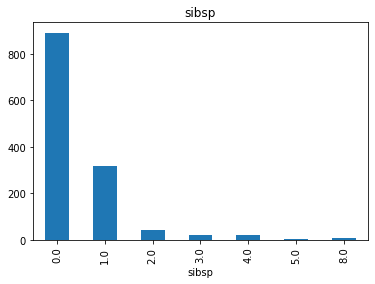

In [16]:
df.groupby('sibsp')['index'].count().plot.bar(stacked=True)
plt.title('sibsp')

Text(0.5, 1.0, 'parch')

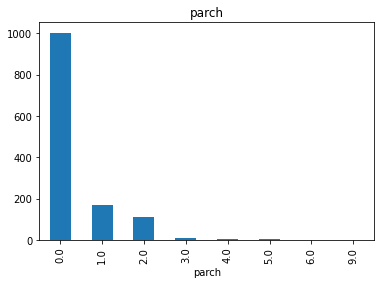

In [17]:
df.groupby('parch')['index'].count().plot.bar(stacked=True)
plt.title('parch')

3. Visualisasikan distribusi dari tiap fitur, dengan data dibagi tiap unique values fitur survived

        total  survived  notSurvived
pclass                              
1.0       323       200          123
2.0       277       119          158
3.0       709       181          528


<AxesSubplot:xlabel='pclass'>

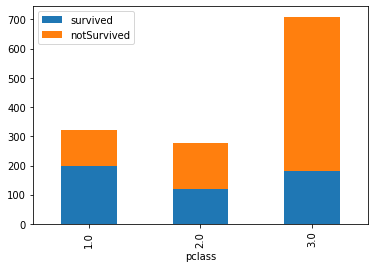

In [18]:
total = df.groupby('pclass')['index'].count()
survived = df[df['survived']==1].groupby('pclass')['index'].count()
notSurvived = df[df['survived']==0].groupby('pclass')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.loc[:,['survived','notSurvived']].plot.bar(stacked=True)

        total  survived  notSurvived
sex                                 
female    466       339          127
male      843       161          682


<AxesSubplot:xlabel='sex'>

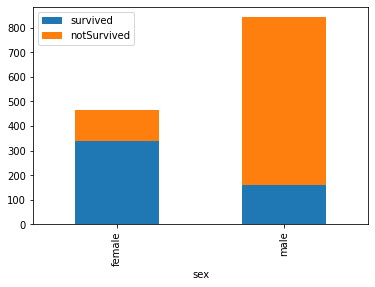

In [19]:
total = df.groupby('sex')['index'].count()
survived = df[df['survived']==1].groupby('sex')['index'].count()
notSurvived = df[df['survived']==0].groupby('sex')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.loc[:,['survived','notSurvived']].plot.bar(stacked=True)

         total  survived  notSurvived
age                                  
0.1667       1         1            0
0.3333       1         0            1
0.4167       1         1            0
0.6667       1         1            0
0.7500       3         2            1
...        ...       ...          ...
70.5000      1         0            1
71.0000      2         0            2
74.0000      1         0            1
76.0000      1         1            0
80.0000      1         1            0

[98 rows x 3 columns]


<AxesSubplot:xlabel='age'>

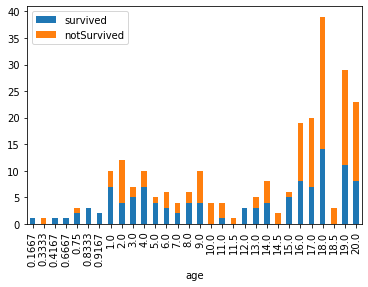

In [20]:
total = df.groupby('age')['index'].count()
survived = df[df['survived']==1].groupby('age')['index'].count()
notSurvived = df[df['survived']==0].groupby('age')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.head(30).loc[:,['survived','notSurvived']].plot.bar(stacked=True)

          total  survived  notSurvived
fare                                  
0.0000       17         2           15
3.1708        1         1            0
4.0125        1         0            1
5.0000        1         0            1
6.2375        1         0            1
...         ...       ...          ...
227.5250      5         3            2
247.5208      3         2            1
262.3750      7         6            1
263.0000      6         4            2
512.3292      4         4            0

[281 rows x 3 columns]


<AxesSubplot:xlabel='fare'>

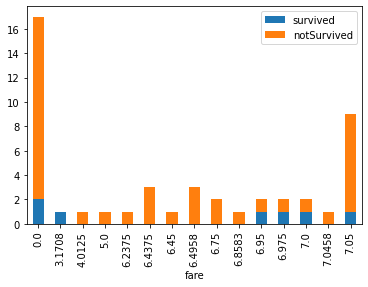

In [21]:
total = df.groupby('fare')['index'].count()
survived = df[df['survived']==1].groupby('fare')['index'].count()
notSurvived = df[df['survived']==0].groupby('fare')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.head(15).loc[:,['survived','notSurvived']].plot.bar(stacked=True)

       total  survived  notSurvived
sibsp                              
0.0      891       309          582
1.0      319       163          156
2.0       42        19           23
3.0       20         6           14
4.0       22         3           19
5.0        6         0            6
8.0        9         0            9


<AxesSubplot:xlabel='sibsp'>

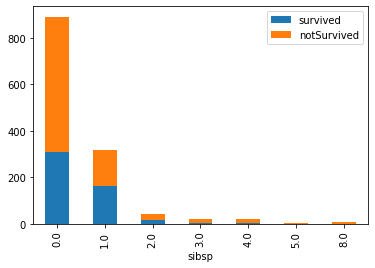

In [22]:
total = df.groupby('sibsp')['index'].count()
survived = df[df['survived']==1].groupby('sibsp')['index'].count()
notSurvived = df[df['survived']==0].groupby('sibsp')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.loc[:,['survived','notSurvived']].plot.bar(stacked=True)

       total  survived  notSurvived
sibsp                              
0.0      891       309          582
1.0      319       163          156
2.0       42        19           23
3.0       20         6           14
4.0       22         3           19
5.0        6         0            6
8.0        9         0            9


<AxesSubplot:xlabel='sibsp'>

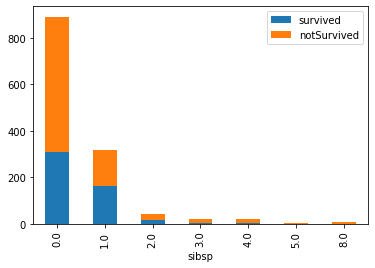

In [23]:
total = df.groupby('sibsp')['index'].count()
survived = df[df['survived']==1].groupby('sibsp')['index'].count()
notSurvived = df[df['survived']==0].groupby('sibsp')['index'].count()
dt = pd.concat([total, survived,notSurvived], axis=1, sort=True)
dt.fillna(0,inplace=True)
dt.columns=['total','survived','notSurvived']
dt = dt.astype('int64')
print(dt)
dt.loc[:,['survived','notSurvived']].plot.bar(stacked=True)

## I.4
Lakukanlah analisa pada data lebih lanjut jika dibutuhkan, kemudian lakukanlah:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan missing values
4. Transformasi data kategorikal menjadi numerikal (encoding), dengan metode yang kalian inginkan
5. Lakukan scaling dengan MinMaxScaler

In [24]:
# I.4 Put your code here

data = {}

# Karena sebutan honorifik menandai status, maka dapat dijadikan fitur
title_count = {}

use_columns = ['pclass', 'title', 'last_name', 'sex', 'age', 'sibsp', 'parch', 'ticket_code', 'fare', 'embarked', 'survived']

for col in use_columns:
    data[col] = []
    
# investigasi fitur tambahan
for value in df.iloc:
    name = value['name']
    ticket = value['ticket']
    
    # memproses title dan last name
    commaIdx = name.find(", ")
    dotIdx = name.find(". ", commaIdx)
    title = name[commaIdx+2:dotIdx]
    last_name = name[:commaIdx]
    if (title not in title_count):
        title_count[title] = 1
    else:
        title_count[title] += 1
    
    # memproses tiket
    ticket_sep = ticket[::-1].find(" ")
    if (ticket_sep != -1):
        ticket_sep = len(ticket)-ticket_sep
        ticket_code = ticket[:ticket_sep].replace(".", "").replace(" ", "")
    else:
        if (ticket == "LINE"):
            ticket_code = "LINE"
        else:
            ticket_code = "-" # reserve label 0
    
    data['pclass'].append(value['pclass'])
    data['title'].append(title)
    data['last_name'].append(last_name)
    data['sex'].append(value['sex'])
    data['age'].append(value['age'])
    data['sibsp'].append(value['sibsp'])
    data['parch'].append(value['parch'])
    data['ticket_code'].append(ticket_code)
    data['fare'].append(value['fare'])
    data['embarked'].append(value['embarked'])
    data['survived'].append(value['survived'])

# Data understanding kolom title count
print("Title count:")
for title in title_count:
    print("• "+title+": "+str(title_count[title]))

# Untuk memudahkan, beberapa sebutan digabung, terutama yang frekuensiya jarang dalam dataset
# selebihnya, sebutan wanita dapat digabung menjadi Mrs dan Miss, sesuai
# https://newrepublic.com/article/119432/history-female-titles-mistress-miss-mrs-or-ms
titles_map = {'Miss': 'Miss', 'Mrs': 'Mrs', 'Mr': 'Mr', 'Master': 'Master', 'Dr': 'Other', 'Rev': 'Other', 'Don': 'Other', 'Col': 'Army', 'Mme': 'Mrs', 'Capt': 'Army', 'Sir': 'Other', 'Ms': 'Mrs', 'the Countess': 'Nobility', 'Dona': 'Other', 'Mlle': 'Miss', 'Major': 'Army', 'Lady': 'Nobility', 'Jonkheer': 'Other'}

for i, title in enumerate(data['title']):
    data['title'][i] = titles_map[title]

print("\nDataset dengan fitur ditambahkan/dihilangkan:")
new_df = pd.DataFrame(data)
print(new_df)

# Penanganan missing values
new_df.describe()

new_df['age'] = new_df['age'].fillna(new_df['age'].mean())
# for each passanger class, fill missing fare as average fare of each passanger class
for pclass in new_df['pclass'].unique():
    avg_fare_of_pclass = new_df[(new_df['pclass'] == pclass)][['fare']].mean()[0]
    new_df.loc[(new_df['pclass'] == pclass), 'fare'] = new_df[(new_df['pclass'] == pclass)][['fare']].fillna(avg_fare_of_pclass)

new_df['embarked'] = new_df['embarked'].fillna(new_df['embarked'].mode()[0])


# Validasi tidak ada missing value
print("\nJumlah missing value:")
for column in new_df.columns[1:]:
    if (column != "survived"):
        print("• "+column+str(": ")+str(len(new_df[new_df[column].isna()])))
        

# Label encoding
use_df = new_df.copy()

le = LabelEncoder()
classes = {}
for column in use_df.columns:
    le.fit(use_df[column])
    use_df[column] = le.transform(use_df[column])
    classes[column] = le.classes_

print("\nHasil encoding:\n")
print(use_df[['title', 'last_name', 'sex', 'ticket_code', 'embarked']])

# Scaling
scaler = MinMaxScaler()
use_df[['pclass', 'title', 'last_name', 'sex', 'age', 'sibsp', 'parch', 'ticket_code', 'fare', 'embarked']] = scaler.fit_transform(use_df[['pclass', 'title', 'last_name', 'sex', 'age', 'sibsp', 'parch', 'ticket_code', 'fare', 'embarked']])

print("\nHasil scaling:\n")
print(use_df[['pclass', 'title', 'last_name', 'sex', 'age', 'sibsp', 'parch', 'ticket_code', 'fare', 'embarked']])

Title count:
• Miss: 260
• Mrs: 197
• Mr: 757
• Master: 61
• Dr: 8
• Rev: 8
• Don: 1
• Col: 4
• Mme: 1
• Capt: 1
• Sir: 1
• Ms: 2
• the Countess: 1
• Dona: 1
• Mlle: 2
• Major: 2
• Lady: 1
• Jonkheer: 1

Dataset dengan fitur ditambahkan/dihilangkan:
      pclass title             last_name     sex   age  sibsp  parch  \
0        3.0  Miss              Abelseth  female  16.0    0.0    0.0   
1        3.0  Miss                 Burns  female  18.0    0.0    0.0   
2        1.0  Miss               Fortune  female  24.0    3.0    2.0   
3        3.0   Mrs        de Messemaeker  female  36.0    1.0    0.0   
4        3.0    Mr               Jonsson    male  27.0    0.0    0.0   
...      ...   ...                   ...     ...   ...    ...    ...   
1304     3.0    Mr                  Dahl    male  45.0    0.0    0.0   
1305     1.0    Mr  Penasco y Castellana    male  18.0    1.0    0.0   
1306     2.0  Miss                Becker  female  12.0    2.0    1.0   
1307     3.0  Miss            

# II. Experiments Design
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal ini meliputi:
1. Pembuatan model
2. Proses validasi
3. Hyperparameter tuning

## II.1
Tentukanlah metrics yang akan digunakan pada eksperimen kali ini (dapat lebih dari 1 metric)

Metrics yang akan digunakan yaitu classification metrics.

    - Accuracy Score
    - Precision Score
    - Recall Score
    - F1-score

In [25]:
RD_STATE = 0

## II.2 
Bagi data dengan perbandingan 0.8 untuk data train dan 0.2 untuk data validasi

In [26]:
X = use_df.loc[:, use_df.columns!='survived']
Y = use_df['survived']

In [27]:
X

pclass     title  last_name  sex       age     sibsp     parch  \
0        1.0  0.333333   0.002288  0.0  0.244898  0.000000  0.000000   
1        1.0  0.333333   0.124714  0.0  0.265306  0.000000  0.000000   
2        0.0  0.333333   0.294050  0.0  0.367347  0.500000  0.285714   
3        1.0  0.666667   0.994279  0.0  0.561224  0.166667  0.000000   
4        1.0  0.500000   0.441648  1.0  0.418367  0.000000  0.000000   
...      ...       ...        ...  ...       ...       ...       ...   
1304     1.0  0.500000   0.211670  1.0  0.683673  0.000000  0.000000   
1305     0.0  0.500000   0.717391  1.0  0.265306  0.166667  0.000000   
1306     0.5  0.333333   0.075515  0.0  0.193878  0.333333  0.142857   
1307     1.0  0.333333   0.629291  0.0  0.459184  0.166667  0.000000   
1308     1.0  0.500000   0.800915  1.0  0.459184  1.000000  0.285714   

      ticket_code      fare  embarked  
0            0.00  0.103203       1.0  
1            0.00  0.167260       0.5  
2            0.00  0.996441       1.0  
3            0.00  0.466192       1.0  
4            0.00  0.160142       1.0  
...           ...       ...       ...  
1304         0.00  0.185053       1.0  
1305         0.45  0.932384       0.0  
1306         0.00  0.708185       1.0  
1307         0.00  0.430605       0.5  
1308         0.25  0.839858       1.0  

[1309 rows x 10 columns]

In [28]:
Y

0       1
1       0
2       1
3       1
4       0
       ..
1304    1
1305    0
1306    1
1307    1
1308    0
Name: survived, Length: 1309, dtype: int64

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=RD_STATE)

In [30]:
X_train

pclass     title  last_name  sex       age  sibsp     parch  \
1118     1.0  0.500000   0.540046  1.0  0.459184    0.0  0.000000   
44       1.0  0.500000   0.986270  1.0  0.459184    0.0  0.000000   
1072     1.0  0.500000   0.972540  1.0  0.438776    0.0  0.000000   
1130     0.5  0.500000   0.734554  1.0  0.663265    0.0  0.142857   
574      1.0  0.500000   0.284897  1.0  0.265306    0.0  0.000000   
...      ...       ...        ...  ...       ...    ...       ...   
763      0.0  1.000000   0.494279  0.0  0.734694    0.0  0.000000   
835      0.0  0.500000   0.132723  1.0  0.459184    0.0  0.000000   
1216     1.0  0.666667   0.696796  0.0  0.642857    0.0  0.714286   
559      1.0  0.500000   0.160183  1.0  0.316327    0.0  0.000000   
684      0.0  0.333333   0.088101  0.0  0.448980    0.0  0.000000   

      ticket_code      fare  embarked  
1118        0.250  0.088968       1.0  
44          0.000  0.064057       0.0  
1072        0.000  0.459075       1.0  
1130        0.725  0.508897       1.0  
574         0.000  0.142349       1.0  
...           ...       ...       ...  
763         0.000  0.565836       1.0  
835         0.000  0.644128       1.0  
1216        0.000  0.718861       1.0  
559         0.050  0.117438       0.5  
684         0.450  0.982206       1.0  

[1047 rows x 10 columns]

In [31]:
X_test

pclass     title  last_name  sex       age     sibsp     parch  \
1139     1.0  0.500000   0.464531  1.0  0.459184  0.166667  0.000000   
533      1.0  0.500000   0.656751  1.0  0.612245  0.000000  0.000000   
459      1.0  0.166667   0.037757  1.0  0.204082  0.666667  0.285714   
1150     1.0  0.500000   0.668192  1.0  0.459184  0.000000  0.000000   
393      1.0  0.500000   0.288330  1.0  0.459184  0.000000  0.000000   
...      ...       ...        ...  ...       ...       ...       ...   
753      0.5  0.666667   0.736842  0.0  0.500000  0.000000  0.000000   
1052     1.0  0.500000   0.747140  1.0  0.459184  0.000000  0.000000   
426      0.0  0.500000   0.649886  1.0  0.908163  0.000000  0.000000   
554      0.0  0.666667   0.883295  0.0  0.897959  0.166667  0.000000   
1213     1.0  0.500000   0.731121  1.0  0.387755  0.166667  0.000000   

      ticket_code      fare  embarked  
1139        0.000  0.128114       0.5  
533         0.875  0.177936       1.0  
459         0.000  0.651246       1.0  
1150        0.000  0.128114       0.5  
393         0.000  0.128114       0.5  
...           ...       ...       ...  
753         0.000  0.355872       1.0  
1052        0.000  0.174377       1.0  
426         0.000  0.569395       1.0  
554         0.450  0.982206       1.0  
1213        0.000  0.131673       1.0  

[262 rows x 10 columns]

In [32]:
Y_train

1118    0
44      0
1072    0
1130    0
574     0
       ..
763     1
835     0
1216    0
559     0
684     1
Name: survived, Length: 1047, dtype: int64

In [33]:
Y_test

1139    0
533     1
459     0
1150    0
393     0
       ..
753     1
1052    0
426     0
554     0
1213    0
Name: survived, Length: 262, dtype: int64

## II.3
Lakukanlah:
1. Prediksi dengan menggunakan model Logistic Regression sebagai *baseline*

In [34]:
logreg = LogisticRegression(random_state=RD_STATE).fit(X_train, Y_train)
prediction = logreg.predict(X_test)
print("Hasil prediksi dengan Logistic Regression: ")
print(list(prediction))
print()
print("Hasil aktual dari dataset: ")
print(list(Y_test))

Hasil prediksi dengan Logistic Regression: 
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]

Hasil aktual dari dataset: 
[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0

2. Tampilkan evaluasi dari model yang dibangun dari metrics yang anda tentukan pada II.1

In [35]:
print("Classification report dari hasil prediksi : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi :",accuracy_score(Y_test, prediction))

Classification report dari hasil prediksi : 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       168
           1       0.71      0.68      0.70        94

    accuracy                           0.79       262
   macro avg       0.77      0.76      0.77       262
weighted avg       0.78      0.79      0.79       262


Dapat dilihat bahwa,
Nilai dari precision hasil prediksi : 0.7111111111111111
Nilai dari recall hasil prediksi : 0.6808510638297872
Nilai dari f1 score hasil prediksi : 0.6956521739130436
Dengan accuracy hasil prediksi : 0.7862595419847328


3. Tampilkan confusion matrix

In [36]:
print("Confusion Matrix dari hasil prediksi : ")
print(confusion_matrix(Y_test, prediction))

Confusion Matrix dari hasil prediksi : 
[[142  26]
 [ 30  64]]


## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. Hyperparameter tuning model yang kalian pakai dengan menggunakan Grid Search (perhatikan random factor pada beberapa algoritma model)
3. Lakukan validasi dengan menggunakan cross validation


In [37]:
# II.4 Put your code here

# Pembelajaran dengan Support Vector Machine
svc = SVC(random_state=RD_STATE).fit(X_train, Y_train)
prediction = svc.predict(X_test)
print("Hasil prediksi dengan Support Vector Machine: ")
print(list(prediction))
print()
print("Hasil aktual dari dataset: ")
print(list(Y_test))
print()
print("Classification report dari hasil prediksi : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi :",accuracy_score(Y_test, prediction))

Hasil prediksi dengan Support Vector Machine: 
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]

Hasil aktual dari dataset: 
[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0

In [38]:
# Grid Search, variable kernel (sigmoid/poly/rbf) dan nilai penalty C (0.1-1.9)
parameters = {'kernel':('sigmoid', 'poly', 'rbf'), 'C':np.array(range(1, 20))/10}
svc_tuned = GridSearchCV(SVC(random_state=RD_STATE), parameters)
svc_tuned.fit(X_train, Y_train)
best_params = svc_tuned.best_params_

print("\nBest params:")
print("• kernel: "+str(best_params['kernel']))
print("• C\t: "+str(best_params['C']))

prediction = svc_tuned.predict(X_test)

print("\nClassification report dari hasil prediksi : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi :",accuracy_score(Y_test, prediction))

# Cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=RD_STATE)
cv_scores = cross_validate(svc_tuned, X, Y, cv=cv, scoring=['precision', 'recall', 'f1', 'accuracy'])

print("\nCross validation result:\n")
print("• Mean precision: "+str(np.mean(cv_scores['test_precision'])))
print("• Mean recall\t: "+str(np.mean(cv_scores['test_recall'])))
print("• Mean f1\t: "+str(np.mean(cv_scores['test_f1'])))
print("• Mean accuracy\t: "+str(np.mean(cv_scores['test_accuracy'])))


Best params:
• kernel: poly
• C	: 0.4

Classification report dari hasil prediksi : 
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       168
           1       0.75      0.69      0.72        94

    accuracy                           0.81       262
   macro avg       0.79      0.78      0.78       262
weighted avg       0.80      0.81      0.80       262


Dapat dilihat bahwa,
Nilai dari precision hasil prediksi : 0.7471264367816092
Nilai dari recall hasil prediksi : 0.6914893617021277
Nilai dari f1 score hasil prediksi : 0.7182320441988951
Dengan accuracy hasil prediksi : 0.8053435114503816

Cross validation result:

• Mean precision: 0.8165889383221876
• Mean recall	: 0.6734231890124185
• Mean f1	: 0.7359115820569255
• Mean accuracy	: 0.8167938931297709


# III. Improvement
Terdapat beberapa metode untuk melakukan peningkatan performa, contohnya adalah:
1. Melakukan oversampling / undersampling pada data
2. Menggabungkan beberapa model 

Pada bagian ini, kalian diharapkan dapat:
1. Melakukan training dengan data hasil oversampling / undersampling dan melakukan validasi dengan benar
2. Memahami beberapa metode untuk menggabungkan beberapa model

## III.1
Lakukanlah:
1. Oversampling pada kelas minoritas pada data train, kemudian train dengan model *baseline* (II.3), lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2

Data train dataset :
0    641
1    406
Name: survived, dtype: int64


<AxesSubplot:ylabel='survived'>

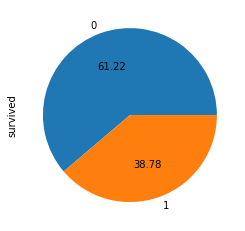

In [39]:
print("Data train dataset :")
print(Y_train.value_counts())
Y_train.value_counts().plot.pie(autopct='%.2f')

Data train setelah oversampling :
0    641
1    641
Name: survived, dtype: int64


<AxesSubplot:ylabel='survived'>

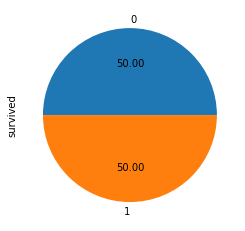

In [40]:
print("Data train setelah oversampling :")
ros = RandomOverSampler(sampling_strategy="not majority", random_state=RD_STATE) # String
over_X_train, over_Y_train = ros.fit_resample(X_train, Y_train)

print(over_Y_train.value_counts())
over_Y_train.value_counts().plot.pie(autopct='%.2f')

In [41]:
logreg = LogisticRegression(random_state=RD_STATE).fit(over_X_train, over_Y_train)
prediction = logreg.predict(X_test)
print("Hasil prediksi dengan Logistic Regression: ")
print(list(prediction))
print()
print("Hasil aktual dari dataset: ")
print(list(Y_test))

Hasil prediksi dengan Logistic Regression: 
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]

Hasil aktual dari dataset: 
[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0

In [42]:
print("Classification report dari hasil prediksi : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi :",accuracy_score(Y_test, prediction))

Classification report dari hasil prediksi : 
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       168
           1       0.67      0.74      0.71        94

    accuracy                           0.78       262
   macro avg       0.76      0.77      0.76       262
weighted avg       0.79      0.78      0.78       262


Dapat dilihat bahwa,
Nilai dari precision hasil prediksi : 0.6730769230769231
Nilai dari recall hasil prediksi : 0.7446808510638298
Nilai dari f1 score hasil prediksi : 0.7070707070707072
Dengan accuracy hasil prediksi : 0.7786259541984732


In [43]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=RD_STATE)
cv_scores = cross_validate(logreg, X, Y, cv=cv, scoring=['precision', 'recall', 'f1', 'accuracy'])

print("\nCross validation result:\n")
print("• Mean precision: "+str(np.mean(cv_scores['test_precision'])))
print("• Mean recall\t: "+str(np.mean(cv_scores['test_recall'])))
print("• Mean f1\t: "+str(np.mean(cv_scores['test_f1'])))
print("• Mean accuracy\t: "+str(np.mean(cv_scores['test_accuracy'])))


Cross validation result:

• Mean precision: 0.7580048956940095
• Mean recall	: 0.6889381591238106
• Mean f1	: 0.7207090301406919
• Mean accuracy	: 0.7965648854961832


2. Undersampling pada kelas mayoritas pada data train, kemudian train dengan model *baseline* (II.3) lakukan validasi dengan data validasi. Data train dan validasi adalah data yang kalian bagi pada bagian II.2

Data train dataset :
0    641
1    406
Name: survived, dtype: int64


<AxesSubplot:ylabel='survived'>

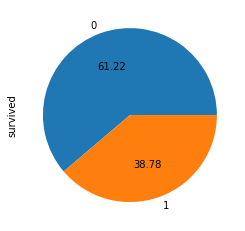

In [44]:
print("Data train dataset :")
print(Y_train.value_counts())
Y_train.value_counts().plot.pie(autopct='%.2f')

Data train setelah undersampling :
0    406
1    406
Name: survived, dtype: int64


<AxesSubplot:ylabel='survived'>

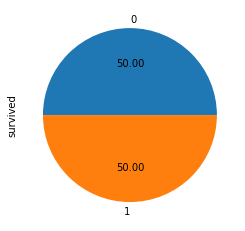

In [45]:
print("Data train setelah undersampling :")
rus = RandomUnderSampler(sampling_strategy=1, random_state=RD_STATE) # String
under_X_train, under_Y_train = rus.fit_resample(X_train, Y_train)

print(under_Y_train.value_counts())
under_Y_train.value_counts().plot.pie(autopct='%.2f')

In [46]:
logreg = LogisticRegression(random_state=RD_STATE).fit(under_X_train, under_Y_train)
prediction = logreg.predict(X_test)
print("Hasil prediksi dengan Logistic Regression: ")
print(list(prediction))
print()
print("Hasil aktual dari dataset: ")
print(list(Y_test))

Hasil prediksi dengan Logistic Regression: 
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]

Hasil aktual dari dataset: 
[0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0

In [47]:
print("Classification report dari hasil prediksi : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi :",accuracy_score(Y_test, prediction))

Classification report dari hasil prediksi : 
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       168
           1       0.69      0.74      0.71        94

    accuracy                           0.79       262
   macro avg       0.77      0.78      0.77       262
weighted avg       0.79      0.79      0.79       262


Dapat dilihat bahwa,
Nilai dari precision hasil prediksi : 0.6862745098039216
Nilai dari recall hasil prediksi : 0.7446808510638298
Nilai dari f1 score hasil prediksi : 0.7142857142857144
Dengan accuracy hasil prediksi : 0.7862595419847328


In [48]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=RD_STATE)
cv_scores = cross_validate(logreg, X, Y, cv=cv, scoring=['precision', 'recall', 'f1', 'accuracy'])

print("\nCross validation result:\n")
print("• Mean precision: "+str(np.mean(cv_scores['test_precision'])))
print("• Mean recall\t: "+str(np.mean(cv_scores['test_recall'])))
print("• Mean f1\t: "+str(np.mean(cv_scores['test_f1'])))
print("• Mean accuracy\t: "+str(np.mean(cv_scores['test_accuracy'])))


Cross validation result:

• Mean precision: 0.7580048956940095
• Mean recall	: 0.6889381591238106
• Mean f1	: 0.7207090301406919
• Mean accuracy	: 0.7965648854961832


## III.2
Lakukanlah:
1. Eksplorasi soft voting, hard voting, dan stacking
2. Buatlah model Logistic Regression dan SVM (boleh menggunakan model dengan beberapa parameter yang berbeda)
3. Lakukanlah soft voting dari model-model yang sudah kalian buat pada poin 2
4. Lakukan hard voting dari model-model yang sudah kalian buat pada poin 2
5. Lakukanlah stacking dengan final classifier adalah Logistic Regression dari model-model yang sudah kalian buat pada poin 2
6. Lakukan validasi dengan metrics yang kalian tentukan untuk poin 3, 4, dan 5

Put your answer for section III.2 point 1 here

In [49]:
# III.2 Put your code here

# Soft Voting
# Prediksi kelas label berdasarkan total probabilitas yang diprediksi masing model

lr = LogisticRegression(random_state=RD_STATE)
svm1 = SVC(C=1, probability=True, random_state=RD_STATE)
svm2 = SVC(C=0.3, probability=True, random_state=RD_STATE)

soft_voting_clf = VotingClassifier(estimators=[('lr', lr), ('svm1', svm1), ('svm2', svm2)], voting='soft')
soft_voting_clf.fit(X_train, Y_train)
prediction = soft_voting_clf.predict(X_test)

print("1. Soft Voting\n")
print("Classification report dari hasil prediksi soft voting : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi soft voting :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi soft voting :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi soft voting :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi soft voting :",accuracy_score(Y_test, prediction))

# Cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=RD_STATE)
cv_scores = cross_validate(soft_voting_clf, X, Y, cv=cv, scoring=['precision', 'recall', 'f1', 'accuracy'])

print("\nCross validation result:\n")
print("• Mean precision: "+str(np.mean(cv_scores['test_precision'])))
print("• Mean recall\t: "+str(np.mean(cv_scores['test_recall'])))
print("• Mean f1\t: "+str(np.mean(cv_scores['test_f1'])))
print("• Mean accuracy\t: "+str(np.mean(cv_scores['test_accuracy'])))

# Hard voting
# Prediksi kelas label berdasarkan kelas 
hard_voting_clf = VotingClassifier(estimators=[('lr', lr), ('svm1', svm1), ('svm2', svm2)], voting='hard')
hard_voting_clf.fit(X_train, Y_train)
prediction = hard_voting_clf.predict(X_test)

print("\n2. Hard Voting")
print("Classification report dari hasil prediksi hard voting : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi hard voting :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi hard voting :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi hard voting :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi hard voting :",accuracy_score(Y_test, prediction))

# Cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=RD_STATE)
cv_scores = cross_validate(hard_voting_clf, X, Y, cv=cv, scoring=['precision', 'recall', 'f1', 'accuracy'])

print("\nCross validation result:\n")
print("• Mean precision: "+str(np.mean(cv_scores['test_precision'])))
print("• Mean recall\t: "+str(np.mean(cv_scores['test_recall'])))
print("• Mean f1\t: "+str(np.mean(cv_scores['test_f1'])))
print("• Mean accuracy\t: "+str(np.mean(cv_scores['test_accuracy'])))

# Stacking
# Mengkombinasi prediksi masing model untuk membuat model ensemble terbaik
stacking_clf = StackingClassifier(estimators=[('lr', lr), ('svm1', svm1), ('svm2', svm2)], final_estimator=LogisticRegression())
stacking_clf.fit(X_train, Y_train)
prediction = stacking_clf.predict(X_test)

print("\n3. Stacking")
print("Classification report dari hasil prediksi stacking : ")
print(classification_report(Y_test, prediction))
print()
print("Dapat dilihat bahwa,")
print("Nilai dari precision hasil prediksi stacking :", precision_score(Y_test, prediction))
print("Nilai dari recall hasil prediksi stacking :", recall_score(Y_test, prediction))
print("Nilai dari f1 score hasil prediksi stacking :", f1_score(Y_test, prediction))
print("Dengan accuracy hasil prediksi stacking :",accuracy_score(Y_test, prediction))

# Cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=RD_STATE)
cv_scores = cross_validate(stacking_clf, X, Y, cv=cv, scoring=['precision', 'recall', 'f1', 'accuracy'])

print("\nCross validation result:\n")
print("• Mean precision: "+str(np.mean(cv_scores['test_precision'])))
print("• Mean recall\t: "+str(np.mean(cv_scores['test_recall'])))
print("• Mean f1\t: "+str(np.mean(cv_scores['test_f1'])))
print("• Mean accuracy\t: "+str(np.mean(cv_scores['test_accuracy'])))

1. Soft Voting

Classification report dari hasil prediksi soft voting : 
              precision    recall  f1-score   support

           0       0.82      0.88      0.84       168
           1       0.74      0.65      0.69        94

    accuracy                           0.79       262
   macro avg       0.78      0.76      0.77       262
weighted avg       0.79      0.79      0.79       262


Dapat dilihat bahwa,
Nilai dari precision hasil prediksi soft voting : 0.7439024390243902
Nilai dari recall hasil prediksi soft voting : 0.648936170212766
Nilai dari f1 score hasil prediksi soft voting : 0.6931818181818182
Dengan accuracy hasil prediksi soft voting : 0.7938931297709924

Cross validation result:

• Mean precision: 0.8033508220959039
• Mean recall	: 0.6383168369345074
• Mean f1	: 0.7100675308304885
• Mean accuracy	: 0.801526717557252

2. Hard Voting
Classification report dari hasil prediksi hard voting : 
              precision    recall  f1-score   support

           0      

# IV. Analisis
Bandingkan hasil dari:
1. Model Baseline (II.3)
2. Model lain (II.4)

Pada percobaan ini, model baseline II.3 dengan model lain II.4 memiliki hasil yang berbeda
* Nilai metrics pada Model baseline II.3 (Logistic Regression)
    - Precision hasil prediksi : 0.7111111111111111
    - Recall hasil prediksi : 0.6808510638297872
    - f1 score hasil prediksi : 0.6956521739130436
    - Accuracy hasil prediksi : 0.7862595419847328
* Nilai metrics pada Model lain II.4 (Support Vector Machine)
    - Precision hasil prediksi : 0.7530864197530864
    - Recall hasil prediksi : 0.648936170212766
    - f1 score hasil prediksi : 0.6971428571428572
    - Accuracy hasil prediksi : 0.7977099236641222
* Nilai metrics pada Model lain II.4 (Support Vector Machine dengan Hyperparameter Tuning)
    - Precision hasil prediksi : 0.7471264367816092
    - Recall hasil prediksi : 0.6914893617021277
    - f1 score hasil prediksi : 0.7182320441988951
    - Accuracy hasil prediksi : 0.8053435114503816

Dari kedua model tersebut, dapat disimpulkan bahwa pembelajaran dataset dengan menggunakan model Support Vector Machine (SVM) yang sudah di-tuning hyperparameternya melakukan pembelajaran yang lebih baik dan menghasilkan prediksi yang lebih baik dibandingkan pembelajaran menggunakkan model Logistic Regression maupun Support Vector Machine dengan hyperparameter default. Kinerja SVM dengan hyperparameter tuning lebih baik karena sudah dilakukan pencarian untuk menghasilkan model SVM dengan skor terbaik.

3. Hasil undersampling
4. Hasil oversampling

Pada percobaan ini, pembelajaran setelah undersampling dan pembelajaran setelah oversampling menghasilkan hasil perhitungan nilai metrics yang berbeda, namun tidak cukup signifikan.
- Nilai Metrics
    * Undersampling
        - Precision hasil prediksi : 0.6862745098039216
        - Recall hasil prediksi : 0.7446808510638298
        - f1 score hasil prediksi : 0.7142857142857144
        - Accuracy hasil prediksi : 0.7862595419847328
    * Oversampling
        - Precision hasil prediksi : 0.6730769230769231
        - Recall hasil prediksi : 0.7446808510638298
        - f1 score hasil prediksi : 0.7070707070707072
        - Accuracy hasil prediksi : 0.7786259541984732
- Validation Score
    * Undersampling
        - Mean precision: 0.7580048956940095
        - Mean recall	: 0.6889381591238106
        - Mean f1	: 0.7207090301406919
        - Mean accuracy	: 0.7965648854961832
    * Oversampling
        - Mean precision: 0.7580048956940095
        - Mean recall	: 0.6889381591238106
        - Mean f1	: 0.7207090301406919
        - Mean accuracy	: 0.7965648854961832

Dari kedua peningkatan performa tersebut, dapat disimpulkan bahwa peningkatan performa dengan undersampling merupakan peningkatan performa yang lebih cocok dibandingkan peningkatan performa dengan oversampling. Hal tersebut dikarenakan hasil perhitungan metrics dengan peningkatan performa undersampling menghasilkan nilai yang lebih baik dibandingkan oversampling.

Selain itu, dapat disimpulkan bahwa peningkatan performa dengan undersampling ataupun oversampling, keduanya berhasil
meningkatkan performa dari pembelajaran dataset.

5. Hasil soft voting
6. Hasil hard voting
7. Hasil stacking 

Pada percobaan ini, pembelajaran ensemble menggunakan soft voting dan hard voting menghasilkan perhitungan nilai metrics yang sama. Pembelajaran ensemble menggunakan stacking menghasilkan perhitungan nilai metrics yang berbeda, namun tidak cukup signifikan.

- Nilai Metrics
    * Soft Voting
        - Precision hasil prediksi : 0.7439024390243902
        - Recall hasil prediksi : 0.648936170212766
        - f1 score hasil prediksi : 0.6931818181818182
        - Accuracy hasil prediksi : 0.7938931297709924
    * Hard Voting
        - Precision hasil prediksi : 0.7439024390243902
        - Recall hasil prediksi : 0.648936170212766
        - f1 score hasil prediksi : 0.6931818181818182
        - Accuracy hasil prediksi : 0.7938931297709924
    * Stacking
        - Precision hasil prediksi : 0.7439024390243902
        - Recall hasil prediksi : 0.648936170212766
        - f1 score hasil prediksi : 0.6931818181818182
        - Accuracy hasil prediksi : 0.7938931297709924
- Validation Score
    * Soft Voting
        - Mean precision: 0.8033508220959039
        - Mean recall	: 0.6383168369345074
        - Mean f1	: 0.7100675308304885
        - Mean accuracy	: 0.801526717557252
    * Hard Voting
        - Mean precision: 0.8033508220959039
        - Mean recall	: 0.6383168369345074
        - Mean f1	: 0.7100675308304885
        - Mean accuracy	: 0.801526717557252
    * Stacking
        - Mean precision: 0.8051094748367374
        - Mean recall	: 0.6423569837622877
        - Mean f1	: 0.7133151686651747
        - Mean accuracy	: 0.8034351145038169

Untuk setiap metode ensemble learning, accuracy yang diperoleh tidak lebih baik daripada hasil SVM dengan hyperparameter tuning pada sendirinya. Namun, nilai precision dan f1 mengalami peningkatan, sehingga dapat disimpulkan bahwa metode voting atau stacking memperbaiki kemampuan model memprediksi kasus positif (penumpang survive).